$
2(\frac{4}{1.2\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-11}{1.2})^{2}}+\frac{7}{2.4\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-15}{2.4})^{2}})
$

# Завдання 1

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi


x = sp.Symbol('x')
a = 9
b = 18

# Функція ефективності роботи
f_sp = 2*(4/(1.2*sp.sqrt(2*sp.pi))*sp.exp(-1/2*((x-11)/1.2)**2) + 7/(2.4*sp.sqrt(2*sp.pi))*sp.exp(-1/2*((x-15)/2.4)**2))
f = lambda x: 2*(4/(1.2*np.sqrt(2*np.pi))*np.exp(-0.5*((x-11)/1.2)**2) + 7/(2.4*np.sqrt(2*np.pi))*np.exp(-0.5*((x-15)/2.4)**2))


# Виводимо функцію
print("Функція ефективності роботи:")
sp.pprint(f_sp)


Функція ефективності роботи:
                                                                 2            
                     -42.0138888888889⋅(0.0909090909090909⋅x - 1)             
3.33333333333333⋅√2⋅ℯ                                                2.9166666
────────────────────────────────────────────────────────────────── + ─────────
                                √π                                            

                                                2
            -19.53125⋅(0.0666666666666667⋅x - 1) 
6666667⋅√2⋅ℯ                                     
─────────────────────────────────────────────────
                   √π                            


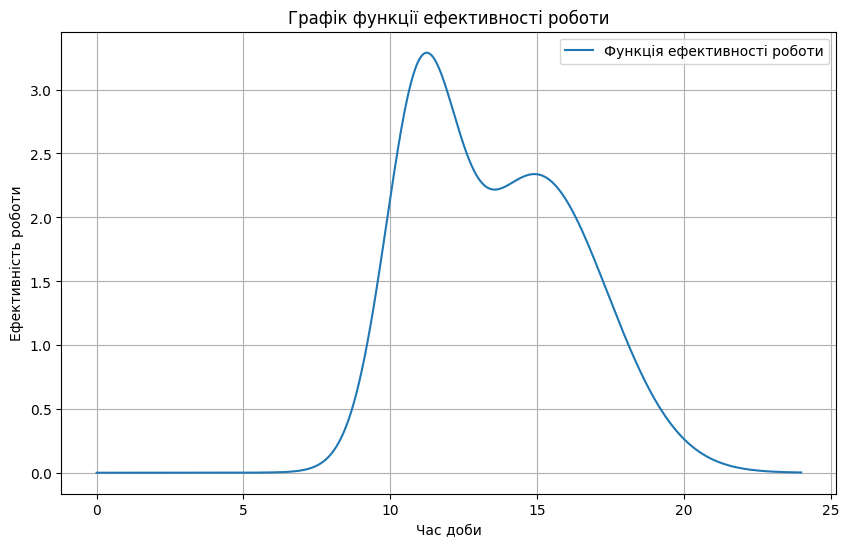

In [ ]:
# Значення x для відрізка від 0 до 24
x_vals = np.linspace(0, 24, 1000)

# Розрахунок значень для кожного x
y_vals = [f_sp.subs(x, val) for val in x_vals]

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='Функція ефективності роботи')
plt.xlabel('Час доби')
plt.ylabel('Ефективність роботи')
plt.title('Графік функції ефективності роботи')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Невизначений інтеграл функції
indefinite_integral = sp.integrate(f_sp, x)
print("Невизначений інтеграл:")
sp.pprint(indefinite_integral)

# Інтеграл від a до b
definite_integral = sp.integrate(f_sp, (x, a, b))
print("Інтеграл від a до b:")
sp.pprint(definite_integral)

Невизначений інтеграл:
4.94974746830583⋅√2⋅erf(0.294627825494395⋅x - 4.41941738241592) + 2.8284271247
4619⋅√2⋅erf(0.58925565098879⋅x - 6.48181216087669)
Інтеграл від a до b:
14.178654163478⋅√2


# Завдання 2

In [ ]:
def rectangle_integration(f, a, b, n):
    """
    Обчислює наближений інтеграл від a до b функції f методом прямокутників.

    Параметри:
    f (callable): Функція, яку потрібно інтегрувати.
    a (float): Нижня межа інтегрування.
    b (float): Верхня межа інтегрування.
    n (int): Кількість прямокутників для апроксимації.
    """
    dx = (b - a) / n  # Ширина кожного прямокутника
    x = np.linspace(a, b, n + 1)
    integral = np.sum(f(x[:-1])) * dx
    return integral

# Інтеграл від a до b, де n = 1000 прямокутників
n_rectangles = 1000
integral_rectangles = rectangle_integration(f, a, b, n_rectangles)
print("Наближений інтеграл від a до b методом прямокутників: ", integral_rectangles)


Наближений інтеграл від a до b методом прямокутників:  20.050284225265784


# Завдання 3

In [ ]:
def trapezoidal_integration(f, a, b, n):
    """
    Обчислює наближений інтеграл від a до b функції f методом трапецій.

    Параметри:
    f (callable): Функція, яку потрібно інтегрувати.
    a (float): Нижня межа інтегрування.
    b (float): Верхня межа інтегрування.
    n (int): Кількість трапецій для апроксимації.
    """
    dx = (b - a) / n  # Ширина кожного трапеції
    x = np.linspace(a, b, n + 1)
    integral = np.sum(0.5 * (f(x[:-1]) + f(x[1:]))) * dx
    return integral

# Інтеграл від a до b з n = 1000 трапецій
n_trapezoids = 1000
integral_trapezoids = trapezoidal_integration(f, a, b, n_trapezoids)
print("Наближений інтеграл від a до b методом трапецій: ", integral_trapezoids)


Наближений інтеграл від a до b методом трапецій:  20.05163433219415


# Завдання 4

In [ ]:
def simpson_integration(f, a, b, n):
    """
    Обчислює наближений інтеграл від a до b функції f методом Сімпсона.

    Параметри:
    f (callable): Функція, яку потрібно інтегрувати.
    a (float): Нижня межа інтегрування.
    b (float): Верхня межа інтегрування.
    n (int): Кількість проміжків для апроксимації (парний).
    """
    if n % 2 != 0:
        raise ValueError("Кількість проміжків n повинна бути парним числом.")

    dx = (b - a) / n  # Ширина кожного проміжку
    x = np.linspace(a, b, n+1)
    integral = np.sum(f(x[0:-2:2]) + 4 * f(x[1::2]) + f(x[2::2])) * dx / 3
    return integral

# Інтеграл від a до b методом Сімпсона з n = 1000 проміжками
n_intervals = 1000
integral_simpson = simpson_integration(f, a, b, n_intervals)
print("Наближений інтеграл від a до b методом Сімпсона: ", integral_simpson)


Наближений інтеграл від a до b методом Сімпсона:  20.05164501419633


# Завдання 5

In [ ]:
import scipy.integrate as spi

# Обчислення інтегралу від a до b за допомогою функції quad
integral_quad, error = spi.quad(f, a, b)
print("Інтеграл від a до b за допомогою функції quad:\n", integral_quad)


Інтеграл від a до b за допомогою функції quad:
 20.051645014188296
